# Trabalho Pratico 1
## 2020089879 - Chrystian Melo

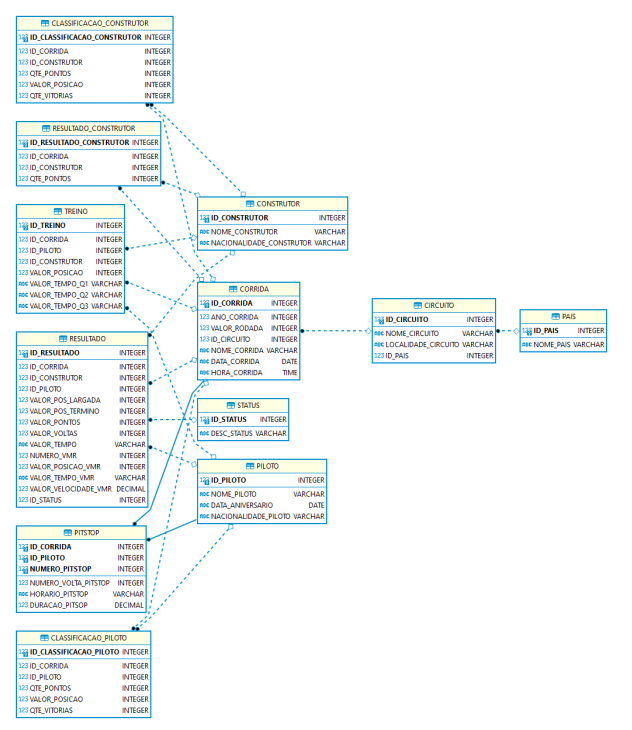

# Praparando o ambiente

In [2]:
import io
import sqlite3
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

arquivo = "/content/drive/MyDrive/Colab Notebooks/IBD/database.sql"

conn = sqlite3.connect('/tmp/consult.db')
cursor = conn.cursor()

f = io.open(arquivo, 'r', encoding='utf-8')
sql = f.read()

cursor.executescript(sql)

Mounted at /content/drive


# Algebra Relacional
20200 - A2 A0 A3 A1 A4


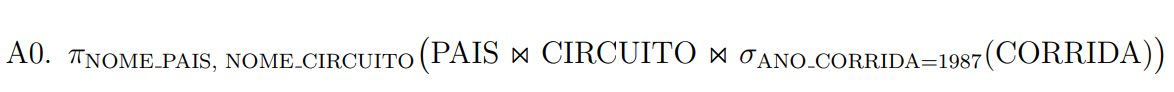

In [3]:
query = """
SELECT
 PAIS.NOME_PAIS, CIRCUITO.NOME_CIRCUITO
FROM
  (CIRCUITO NATURAL JOIN CORRIDA)
  NATURAL JOIN PAIS
WHERE
  CORRIDA.ANO_CORRIDA = '1987'
"""

df = pd.read_sql_query(query, conn)
df

,NOME_PAIS,NOME_CIRCUITO
0,Brasil,Autódromo Internacional Nelson Piquet
1,Itália,Autodromo Enzo e Dino Ferrari
2,Bélgica,Circuit de Spa-Francorchamps
3,Mônaco,Circuit de Monaco
4,EUA,Detroit Street Circuit
5,França,Circuit Paul Ricard
6,Reino Unido,Silverstone Circuit
7,Alemanha,Hockenheimring
8,Hungria,Hungaroring
9,Áustria,A1-Ring


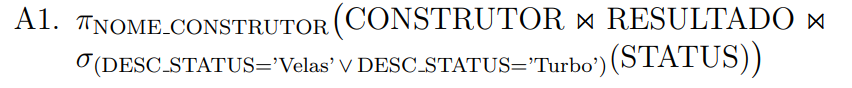

In [150]:
query = """
SELECT DISTINCT
 CONSTRUTOR.NOME_CONSTRUTOR
FROM
  (CONSTRUTOR NATURAL JOIN RESULTADO)
  NATURAL JOIN STATUS
WHERE
  STATUS.DESC_STATUS = 'Velas' OR STATUS.DESC_STATUS = 'Turbo'
ORDER BY
 CONSTRUTOR.NOME_CONSTRUTOR
"""

df = pd.read_sql_query(query, conn)
df

,NOME_CONSTRUTOR
0,ATS
1,Alfa Romeo
2,Arrows
3,Benetton
4,Brabham
5,Caterham
6,Ferrari
7,Kurtis Kraft
8,Lesovsky
9,Ligier


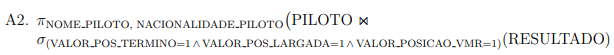

In [151]:
query = """
SELECT DISTINCT
 PILOTO.NOME_PILOTO, PILOTO.NACIONALIDADE_PILOTO
FROM
  (PILOTO NATURAL JOIN RESULTADO)
  NATURAL JOIN STATUS
WHERE
  VALOR_POS_TERMINO = 1 AND VALOR_POS_LARGADA = 1  AND VALOR_POSICAO_VMR = 1
"""

df = pd.read_sql_query(query, conn)
df

,NOME_PILOTO,NACIONALIDADE_PILOTO
0,Kimi Räikkönen,Finlandesa
1,Felipe Massa,Brasileira
2,Lewis Hamilton,Britânica
3,Fernando Alonso,Espanhola
4,Michael Schumacher,Alemã
5,Rubens Barrichello,Brasileira
6,Jenson Button,Britânica
7,Sebastian Vettel,Alemã
8,Nico Rosberg,Alemã
9,Valtteri Bottas,Finlandesa


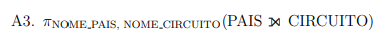

In [157]:
query = """
SELECT
  PAIS.NOME_PAIS, CIRCUITO.NOME_CIRCUITO
FROM
  PAIS LEFT OUTER JOIN CIRCUITO ON PAIS.ID_PAIS = CIRCUITO.ID_PAIS;
"""

df = pd.read_sql_query(query, conn)
df

,NOME_PAIS,NOME_CIRCUITO
0,Alemanha,AVUS
1,Alemanha,Hockenheimring
2,Alemanha,Nürburgring
3,Argentina,Autódromo Oscar y Juan Gálvez
4,Austrália,Adelaide Street Circuit
...,...,...
68,África do Sul,Prince George Circuit
69,Áustria,A1-Ring
70,Áustria,Red Bull Ring
71,Áustria,Zeltweg


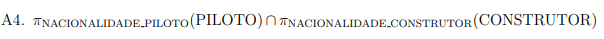

In [7]:
query = """
SELECT
  PILOTO.NACIONALIDADE_PILOTO
FROM
  PILOTO
INTERSECT
SELECT
  CONSTRUTOR.NACIONALIDADE_CONSTRUTOR
FROM
  CONSTRUTOR
"""

df = pd.read_sql_query(query, conn)
df

,NACIONALIDADE_PILOTO
0,Alemã
1,Alemã oriental
2,Americana
3,Australiana
4,Austríaca
5,Belga
6,Brasileira
7,Britânica
8,Canadense
9,Espanhola


# Linguagem Natural
89879 - B8 B9 B0 B7 B1



B8. Liste (1) os anos em que a última prova do ano foi disputada em um circuito do Brasil

In [111]:
query = """
SELECT DISTINCT
  C.ANO_CORRIDA
FROM
  (CORRIDA AS C NATURAL JOIN Circuito)
  NATURAL JOIN PAIS
WHERE PAIS.NOME_PAIS = 'Brasil' AND C.VALOR_RODADA = (
    SELECT MAX(VALOR_RODADA)
    FROM CORRIDA
    WHERE ANO_CORRIDA = C.ANO_CORRIDA
)
ORDER BY
  C.ANO_CORRIDA
"""
df = pd.read_sql_query(query, conn)
df

,ANO_CORRIDA
0,2004
1,2006
2,2007
3,2008
4,2011
5,2012
6,2013


B9. Liste (1) os nomes dos circuitos nos quais o piloto Lewis Hamilton já venceu corridas e (2) quantas vitórias ele tem em cada um deles.

In [78]:
query = """
SELECT
 CIRCUITO.NOME_CIRCUITO, COUNT(CIRCUITO.ID_CIRCUITO) AS VITORIAS
FROM
  ((RESULTADO NATURAL JOIN PILOTO)
  NATURAL JOIN CORRIDA)
  NATURAL JOIN CIRCUITO
WHERE
  PILOTO.NOME_PILOTO = 'Lewis Hamilton' AND RESULTADO.VALOR_POS_TERMINO = 1
GROUP BY
  CIRCUITO.ID_CIRCUITO
"""

df = pd.read_sql_query(query, conn)
df

,NOME_CIRCUITO,VITORIAS
0,Albert Park Grand Prix Circuit,2
1,Sepang International Circuit,1
2,Bahrain International Circuit,2
3,Circuit de Barcelona-Catalunya,2
4,Istanbul Park,1
5,Circuit de Monaco,2
6,Circuit Gilles Villeneuve,6
7,Silverstone Circuit,5
8,Hockenheimring,2
9,Hungaroring,5


B0. Listar (1) o nome do circuito e (2) nome do piloto vencedor de cada corrida de 2017;

In [60]:
query = """
SELECT
 CIRCUITO.NOME_CIRCUITO, PILOTO.NOME_PILOTO
FROM
  ((RESULTADO NATURAL JOIN PILOTO)
  NATURAL JOIN CORRIDA)
  NATURAL JOIN CIRCUITO
WHERE
  ANO_CORRIDA = 2017 AND RESULTADO.VALOR_POS_TERMINO = 1
"""

df = pd.read_sql_query(query, conn)
df

,NOME_CIRCUITO,NOME_PILOTO
0,Albert Park Grand Prix Circuit,Sebastian Vettel
1,Shanghai International Circuit,Lewis Hamilton
2,Bahrain International Circuit,Sebastian Vettel
3,Sochi Autodrom,Valtteri Bottas
4,Circuit de Barcelona-Catalunya,Lewis Hamilton
5,Circuit de Monaco,Sebastian Vettel
6,Circuit Gilles Villeneuve,Lewis Hamilton
7,Baku City Circuit,Daniel Ricciardo
8,Red Bull Ring,Valtteri Bottas
9,Silverstone Circuit,Lewis Hamilton


B7. Liste (1) ano, (2) nome e (3) quantidade de pontos do piloto campeão de cada ano desde 2001.

In [141]:
query = """
SELECT
 CORRIDA.ANO_CORRIDA AS ano, PILOTO.NOME_PILOTO AS nome, MAX(CLASSIFICACAO_PILOTO.QTE_PONTOS)
FROM
  ((CLASSIFICACAO_PILOTO NATURAL JOIN PILOTO)
  NATURAL JOIN CORRIDA)
WHERE
  CORRIDA.ANO_CORRIDA >= 2001 AND CLASSIFICACAO_PILOTO.VALOR_POSICAO = 1
GROUP BY
  CORRIDA.ANO_CORRIDA
"""

df = pd.read_sql_query(query, conn)
df

,ano,nome,MAX(CLASSIFICACAO_PILOTO.QTE_PONTOS)
0,2001,Michael Schumacher,123
1,2002,Michael Schumacher,144
2,2003,Michael Schumacher,93
3,2004,Michael Schumacher,148
4,2005,Fernando Alonso,133
5,2006,Fernando Alonso,134
6,2007,Kimi Räikkönen,110
7,2008,Lewis Hamilton,98
8,2009,Jenson Button,95
9,2010,Sebastian Vettel,256


B1. Pole position é quando o piloto larga da 1a posição. Listar (1) nome, (2) nacionalidade e (3) número de pole positions do piloto que mais vezes largou em 1° em 2015.

In [79]:
query = """
SELECT
 PILOTO.NOME_PILOTO AS nome, PILOTO.NACIONALIDADE_PILOTO AS nacionalidade, COUNT(PILOTO.ID_PILOTO)
FROM
  (RESULTADO NATURAL JOIN PILOTO)
  NATURAL JOIN CORRIDA
WHERE
  RESULTADO.VALOR_POS_LARGADA = 1 AND CORRIDA.ANO_CORRIDA = 2015
GROUP BY
  PILOTO.ID_PILOTO
LIMIT 1
"""

df = pd.read_sql_query(query, conn)
df

,nome,nacionalidade,COUNT(PILOTO.ID_PILOTO)
0,Lewis Hamilton,Britânica,11
